In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import xarray as xr
import cartopy.crs as ccrs
from matplotlib import pyplot as plt

In [35]:
ds=xr.open_dataset(r'C:\Users\aadar\Downloads\SI_SST.nc')

In [3]:
ds.info()

xarray.Dataset {
dimensions:
	expver = 2 ;
	latitude = 201 ;
	longitude = 181 ;
	time = 2040 ;

variables:
	float32 longitude(longitude) ;
		longitude:units = degrees_east ;
		longitude:long_name = longitude ;
	float32 latitude(latitude) ;
		latitude:units = degrees_north ;
		latitude:long_name = latitude ;
	int32 expver(expver) ;
		expver:long_name = expver ;
	datetime64[ns] time(time) ;
		time:long_name = time ;
	float32 sst(time, expver, latitude, longitude) ;
		sst:units = K ;
		sst:long_name = Sea surface temperature ;

// global attributes:
	:Conventions = CF-1.6 ;
	:history = 2021-07-25 19:13:58 GMT by grib_to_netcdf-2.20.0: /opt/ecmwf/mars-client/bin/grib_to_netcdf -S param -o /cache/data0/adaptor.mars.internal-1627240431.9376569-5545-11-2c2b4ff7-6920-43c5-9015-5af82b11d1b2.nc /cache/tmp/2c2b4ff7-6920-43c5-9015-5af82b11d1b2-adaptor.mars.internal-1627240094.8428655-5545-6-tmp.grib ;
}

In [4]:
ds.coords

Coordinates:
  * longitude  (longitude) float32 135.0 135.2 135.5 135.8 ... 179.5 179.8 180.0
  * latitude   (latitude) float32 0.0 -0.25 -0.5 -0.75 ... -49.5 -49.75 -50.0
  * expver     (expver) int32 1 5
  * time       (time) datetime64[ns] 1979-01-01 ... 2021-06-01T18:00:00

In [5]:
ds.data_vars

Data variables:
    sst      (time, expver, latitude, longitude) float32 ...

In [6]:
ds.attrs

{'Conventions': 'CF-1.6',
 'history': '2021-07-25 19:13:58 GMT by grib_to_netcdf-2.20.0: /opt/ecmwf/mars-client/bin/grib_to_netcdf -S param -o /cache/data0/adaptor.mars.internal-1627240431.9376569-5545-11-2c2b4ff7-6920-43c5-9015-5af82b11d1b2.nc /cache/tmp/2c2b4ff7-6920-43c5-9015-5af82b11d1b2-adaptor.mars.internal-1627240094.8428655-5545-6-tmp.grib'}

In [7]:
monthly=ds.groupby('time.month')

In [8]:
monthly_mean=ds.groupby('time.month').mean(dim=['time','expver'])

In [9]:
monthly_mean

<xarray.Dataset>
Dimensions:    (latitude: 201, longitude: 181, month: 12)
Coordinates:
  * longitude  (longitude) float32 135.0 135.2 135.5 135.8 ... 179.5 179.8 180.0
  * latitude   (latitude) float32 0.0 -0.25 -0.5 -0.75 ... -49.5 -49.75 -50.0
  * month      (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    sst        (month, latitude, longitude) float32 302.1 302.1 ... 281.8 281.9

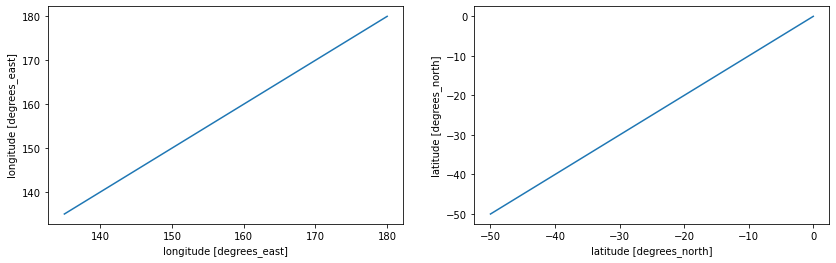

In [10]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14,4))
ds.longitude.plot(ax=ax1)
ds.latitude.plot(ax=ax2)

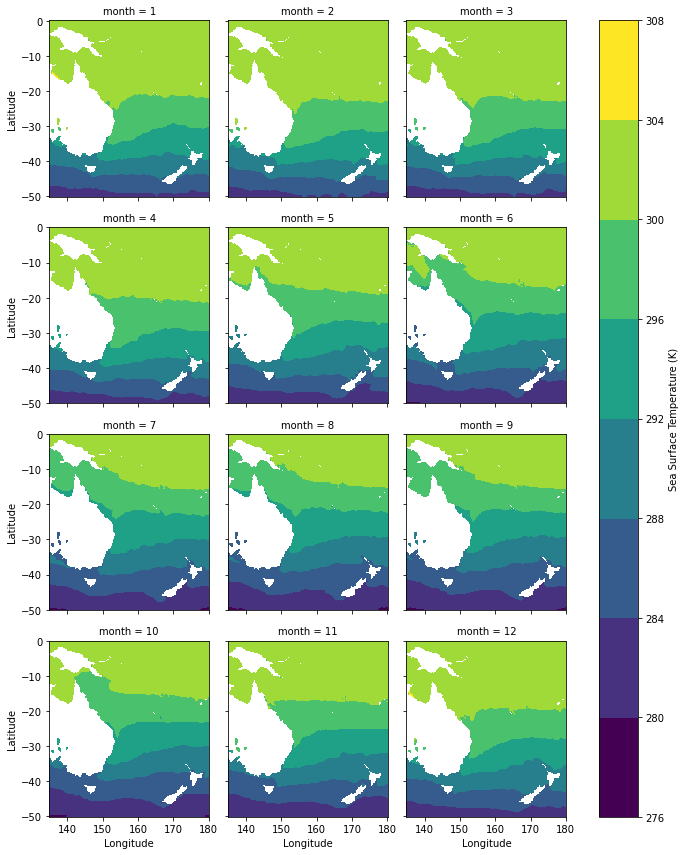

In [11]:
g_simple = monthly_mean.sst.plot(levels=8,x='longitude', y='latitude', col='month', col_wrap=3,cbar_kwargs={"label": "Sea Surface Temperature (K)"})
g_simple.set_xlabels(label='Longitude')
g_simple.set_ylabels(label='Latitude')

In [12]:
ds=ds.assign(mpi=(28.2+ 55.8*(2.71828**((0.1813*(ds["sst"]-303.15))))))
ds

<xarray.Dataset>
Dimensions:    (expver: 2, latitude: 201, longitude: 181, time: 2040)
Coordinates:
  * longitude  (longitude) float32 135.0 135.2 135.5 135.8 ... 179.5 179.8 180.0
  * latitude   (latitude) float32 0.0 -0.25 -0.5 -0.75 ... -49.5 -49.75 -50.0
  * expver     (expver) int32 1 5
  * time       (time) datetime64[ns] 1979-01-01 ... 2021-06-01T18:00:00
Data variables:
    sst        (time, expver, latitude, longitude) float32 301.7 301.7 ... 280.4
    mpi        (time, expver, latitude, longitude) float32 70.87 71.11 ... 29.1
Attributes:
    Conventions:  CF-1.6
    history:      2021-07-25 19:13:58 GMT by grib_to_netcdf-2.20.0: /opt/ecmw...

In [13]:
monthly_mean=ds.groupby('time.month').mean(dim=['time','expver'])

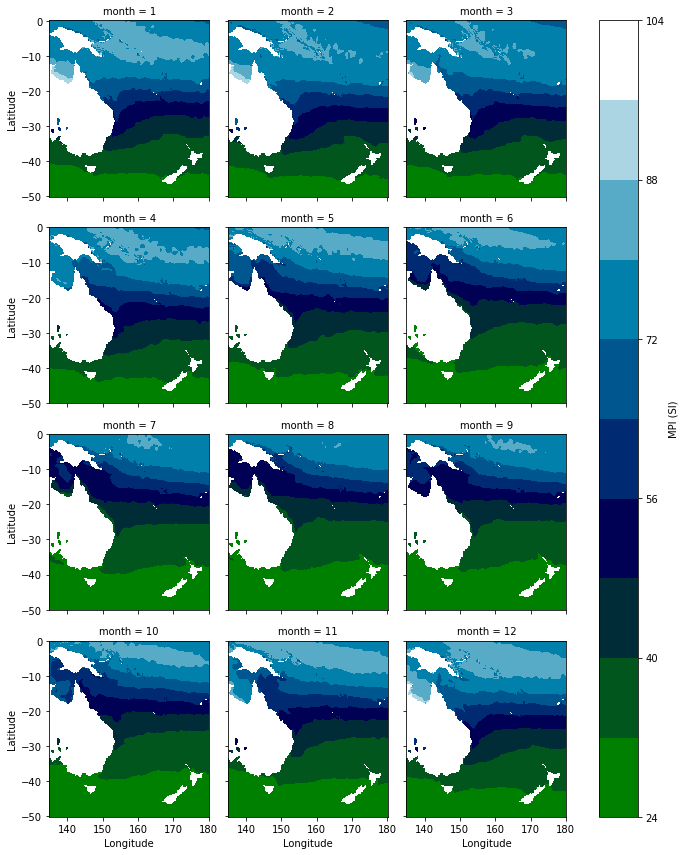

In [14]:
g_simple = monthly_mean.mpi.plot(levels = 10,cmap=plt.cm.ocean,x='longitude', y='latitude', col='month', col_wrap=3,cbar_kwargs={"label": "MPI (SI)"})
g_simple.set_xlabels(label='Longitude')
g_simple.set_ylabels(label='Latitude')

In [15]:
seasonal_mean=ds.groupby('time.season').mean(dim=['time','expver'])

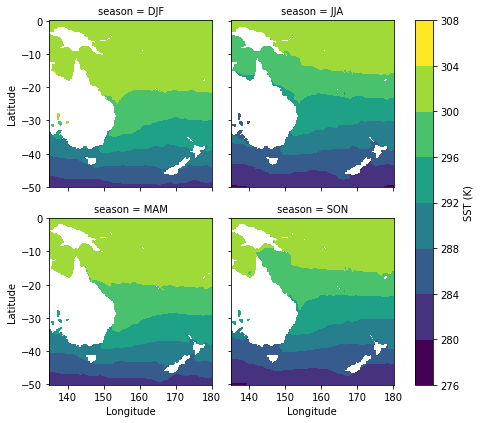

In [16]:
g_simple = seasonal_mean.sst.plot(levels = 8,x='longitude', y='latitude', col='season', col_wrap=2,cbar_kwargs={"label": "SST (K)"})
g_simple.set_xlabels(label='Longitude')
g_simple.set_ylabels(label='Latitude')

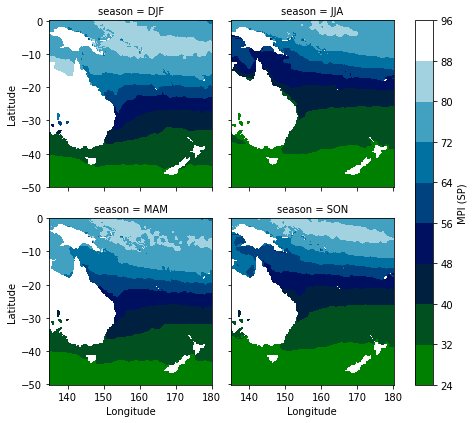

In [17]:

g_simple = seasonal_mean.mpi.plot(levels= 10,cmap=plt.cm.ocean, x='longitude', y='latitude', col='season', col_wrap=2,cbar_kwargs={"label": "MPI (SP)"})
g_simple.set_xlabels(label='Longitude')
g_simple.set_ylabels(label='Latitude')

In [18]:
trends=ds.sst.polyfit(dim='time', deg=1)

In [19]:
trends=trends.mean(dim='degree')

In [20]:
trends

<xarray.Dataset>
Dimensions:               (expver: 2, latitude: 201, longitude: 181)
Coordinates:
  * expver                (expver) int64 1 5
  * latitude              (latitude) float64 0.0 -0.25 -0.5 ... -49.75 -50.0
  * longitude             (longitude) float64 135.0 135.2 135.5 ... 179.8 180.0
Data variables:
    polyfit_coefficients  (expver, latitude, longitude) float64 150.9 ... 350.2

In [21]:
trends=trends.mean(dim='expver')

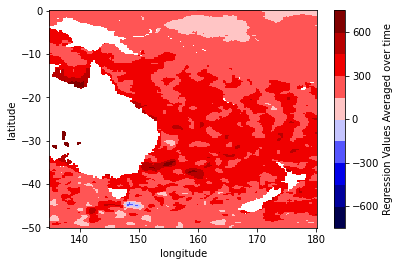

In [22]:
g_simple = trends.polyfit_coefficients.plot (levels=10,cmap=plt.cm.seismic, x='longitude', y='latitude',cbar_kwargs={"label": "Regression Values Averaged over time"})

In [27]:
ds.sst.mean(dim='longitude')

<xarray.DataArray 'sst' (time: 2040, expver: 2, latitude: 201)>
array([[[302.40637, 302.4075 , 302.39514, ..., 283.47614, 283.34598,
         283.22757],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan]],

       [[302.40637, 302.4075 , 302.39514, ..., 283.47614, 283.34598,
         283.22757],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan]],

       [[302.40637, 302.4075 , 302.39514, ..., 283.47614, 283.34598,
         283.22757],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan]],

       ...,

       [[      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [302.71957, 302.73123, 302.74347, ..., 281.82846, 281.67642,
         281.4784 ]],

       [[      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [302.71957, 302.73123, 302.74347, ..., 281.82846, 281.67642,
         281.4784 ]],

       [[      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [302.71957, 302.73123, 302.74347, ..., 281.82846, 281.67642,
         281.4784 ]]], dtype=float32)
Coordinates:
  * latitude  (latitude) float32 0.0 -0.25 -0.5 -0.75 ... -49.5 -49.75 -50.0
  * expver    (expver) int32 1 5
  * time      (time) datetime64[ns] 1979-01-01 ... 2021-06-01T18:00:00

In [36]:
ds=ds.assign(rsst=ds["sst"]-ds.sst.mean(dim='longitude'))

In [37]:
ds

<xarray.Dataset>
Dimensions:    (expver: 2, latitude: 201, longitude: 421, time: 2040)
Coordinates:
  * longitude  (longitude) float32 30.0 30.25 30.5 30.75 ... 134.5 134.8 135.0
  * latitude   (latitude) float32 0.0 -0.25 -0.5 -0.75 ... -49.5 -49.75 -50.0
  * expver     (expver) int32 1 5
  * time       (time) datetime64[ns] 1979-01-01 ... 2021-06-01T18:00:00
Data variables:
    sst        (time, expver, latitude, longitude) float32 nan nan ... 280.1
    rsst       (time, expver, latitude, longitude) float32 nan nan ... 2.633
Attributes:
    Conventions:  CF-1.6
    history:      2021-07-25 19:23:38 GMT by grib_to_netcdf-2.20.0: /opt/ecmw...

In [38]:
monthly_mean=ds.groupby('time.month').mean(dim=['time','expver'])

In [39]:
monthly_mean

<xarray.Dataset>
Dimensions:    (latitude: 201, longitude: 421, month: 12)
Coordinates:
  * longitude  (longitude) float32 30.0 30.25 30.5 30.75 ... 134.5 134.8 135.0
  * latitude   (latitude) float32 0.0 -0.25 -0.5 -0.75 ... -49.5 -49.75 -50.0
  * month      (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    sst        (month, latitude, longitude) float32 nan nan nan ... 280.9 280.9
    rsst       (month, latitude, longitude) float32 nan nan nan ... 2.964 2.941

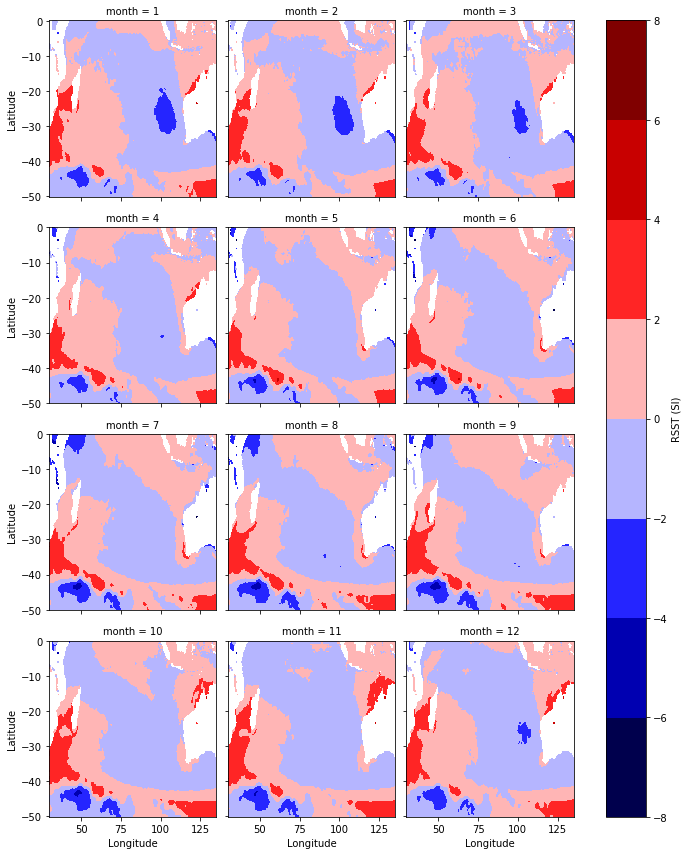

In [41]:
g_simple = monthly_mean.rsst.plot(levels = 10,cmap=plt.cm.seismic,x='longitude', y='latitude', col='month', col_wrap=3,cbar_kwargs={"label": "RSST (SI)"})
g_simple.set_xlabels(label='Longitude')
g_simple.set_ylabels(label='Latitude')